In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#read in the data
merged_data = pd.read_csv('data/merged_data.csv')

In [3]:
#drop index column
merged_data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [4]:
# set X and y
X = merged_data['text']
y = merged_data['subreddit']

In [9]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    stratify=y, 
                                                    random_state=17)

In [23]:
#set stopwords, instantiate pipe
stop = ['buying', 'selling']
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words= stop)),
    ('logreg', LogisticRegression())
])

In [24]:
#set pipe parameters
pipe_params = {
    'cvec__max_features': [1500, 2500, 3000, 3500],
    'cvec__min_df': [10],
    'cvec__max_df': [0.7],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [25]:
# instantiate Gridsearch
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5)

In [26]:
#fit GridSearch
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [27]:
# Score on training data
gs.score(X_train, y_train)

0.9866332497911445

In [28]:
# Score on testing data
gs.score(X_test, y_test)

0.9649122807017544

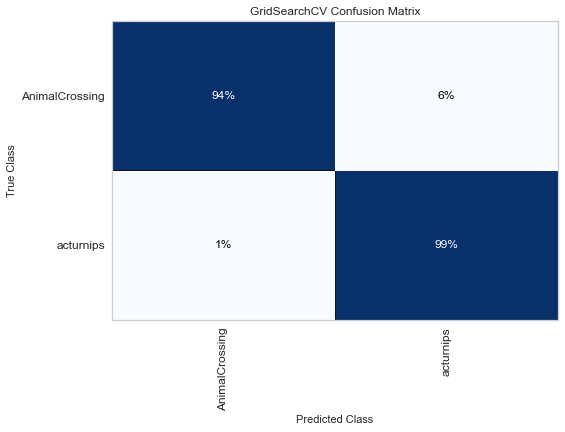

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# From yellowbrick, plot confusion matrix
cm = ConfusionMatrix(gs, classes=['AnimalCrossing', 'acturnips'], percent=True, cmap= 'Blues')

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()